# Importing Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Read csv file

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [40]:
 #encoding "enginetype" Column
 df.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}}, inplace=True)
 #encoding "fueltype" Column
 df.replace({'fueltype':{'gas':0,'diesel':1}}, inplace=True)
 #encoding "fuelsystem" Column
 df.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl' :5,'mfi':6,'spfi':7 }}, inplace=True)




In [41]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,std,two,convertible,rwd,front,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,std,two,convertible,rwd,front,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,std,two,hatchback,rwd,front,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,std,four,sedan,fwd,front,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,std,four,sedan,4wd,front,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [42]:
X = df.drop(['CarName','price','aspiration',  'doornumber', 	'carbody',	'drivewheel',	'enginelocation','cylindernumber'],axis=1)
Y =df['price']

In [43]:
print(X)

     car_ID  symboling  fueltype  wheelbase  carlength  carwidth  carheight  \
0         1          3         0       88.6      168.8      64.1       48.8   
1         2          3         0       88.6      168.8      64.1       48.8   
2         3          1         0       94.5      171.2      65.5       52.4   
3         4          2         0       99.8      176.6      66.2       54.3   
4         5          2         0       99.4      176.6      66.4       54.3   
..      ...        ...       ...        ...        ...       ...        ...   
200     201         -1         0      109.1      188.8      68.9       55.5   
201     202         -1         0      109.1      188.8      68.8       55.5   
202     203         -1         0      109.1      188.8      68.9       55.5   
203     204         -1         1      109.1      188.8      68.9       55.5   
204     205         -1         0      109.1      188.8      68.9       55.5   

     curbweight  enginetype  enginesize  fuelsystem

# Splitting Training and Testing data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Model Training

In [27]:
# loading the linear regression model
lass_reg_model = Lasso()

In [29]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

# Model Evaluation

In [30]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [31]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.888532210320147


# Visualising the Actual Price and Predicted Price

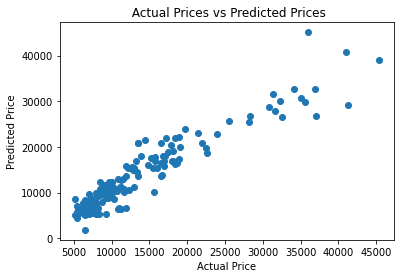

In [32]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [33]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [34]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6573529648576935


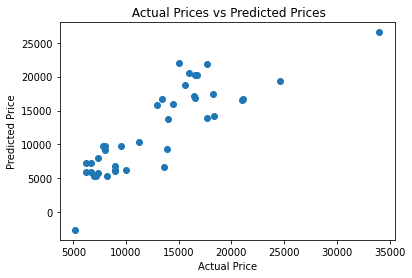

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()